## The Data

- A collection of 125 bonds which are most liquid (probably from the CDX index).
- Some of the bonds have prices around every 15 minutes per day, dating back to the end of 2019.
- BVAL prices summarize trades and high-frequency quotes from broker-dealers (contributors), and price the bond every 15 minutes during market hours - so we only filter for the data within market hour.
    - The summary takes into account the relative strength of trades (volume, recentness) and quotes. 
    - There are outlier detection for odd trades or quotes, by looking at movements against benchmark as well as a single datapoint against the pack. 
    - Also a regime-switching detection so that the output price catches up with the market.
- The IDO prices also produce bid-ask spreads at such frequency.

## The Strategy

- Maintain an estimate of bid-ask spread by exponentially-moving-weighted-average. 
- If the bid price of a bond is at least some multiple (say 2) of bid-ask spread above the bid price from the last epoch (i.e. roughly 15 minutes ago), we sell the bond. Similarly, we buy the bond if its ask price gaps down.
- We take profit whenever we can, i.e. buy back the bond if its ask price is below the bid we sold at, or sell the bond if its bid price is higher than the ask we bought at.
- We avoid initiating positions when the signal is 'too strong', say when the gap is 2.5 times higher than the bid-ask spread estimate.
- The rational is that the gapping behavior of prices probably indicate brokers have inventory issues for the bond, and thus willing to bid higher or ask lower. By providing liquidity and wait for the price to revert to normal, we do a service and make a profit. At the very least, this strategy provide a good indicator for entry.

## The Result

### Sharpe Ratio

These results are from Jan to Jul in 2021. Returns sampled roughly weekly. The Sharpe ratio is pretty high on some bonds, though it is expected to be population and time period specific.

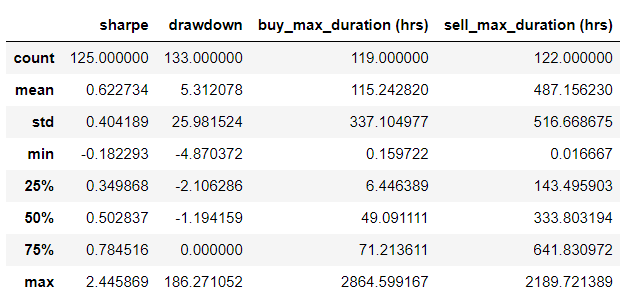

### Drawdown

It is impressive that $75\%$ of bonds have no drawdown.

### Durations of trades

In the above, buy trades seems to be of shorter duration than the sell trades: while $75\%$ of buy trades are less than 3 days, $75\%$ of sell trades are more than a week. This could pose challenges in margin/short-selling requirements.

Surprisingly, the long-only strategy seems to perform the same or even slightly better, which implies short-selling probably hurts MtM while waiting for exit.

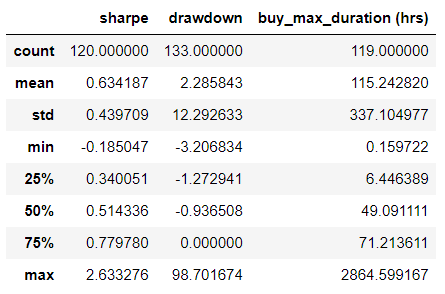

Following is cumulative MtM in this period, as well as the capital commited.

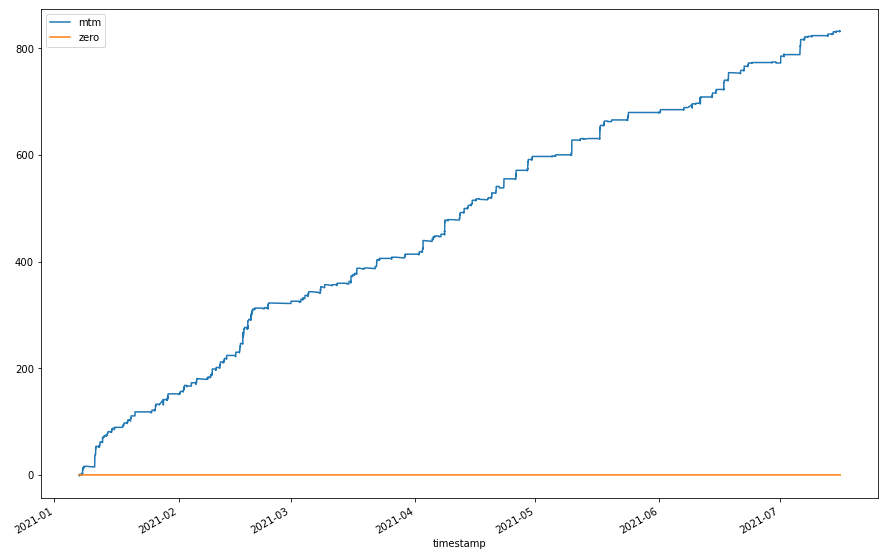

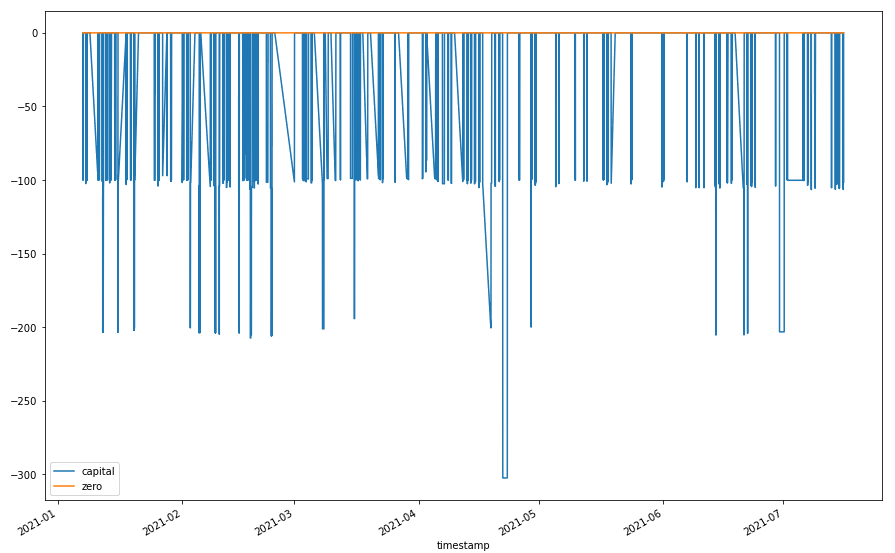